# DSCI 303 – Project 01
### Lauren Forti

This program builds a linear regression model in which a vehicle's weight is used to predict the natural logarithm of the average miles per gallon.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Importing and Viewing the Data
Import and view the data

In [2]:
df = pd.read_table(filepath_or_buffer='auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

Confirm that each list contains 398 values

In [3]:
print(f'The length of weight is {len(weight)}.')
print(f'The length of mpg is {len(mpg)}.')
print(f'The length of ln_mpg is {len(ln_mpg)}.')

The length of weight is 398.
The length of mpg is 398.
The length of ln_mpg is 398.


View the information for the first 10 vehicles in the dataset

In [4]:
labels = ['Weight', 'MPG', 'LN_MPG']

z = 0
# for each column
for i in range(len(labels)):
    # print header and dashes for first iteration
    if z == 0:
        print(f'{labels[i]:>6}{labels[i+1]:>8}{labels[i+2]:>10}')
        print('-' * 24)
        z += 1
    # output each row
    print(f'{weight[i]:>6}{mpg[i]:>8.1f}{ln_mpg[i]:>10.4f}')

Weight     MPG    LN_MPG
------------------------
  3190    27.2    3.3032
  1985    32.8    3.4904
  3410    18.1    2.8959


Create two scatter plots.

The first explores the relationship between MPG and vehicle weight.

The second explores the relationship between natural log of MPG and vehicle weight.

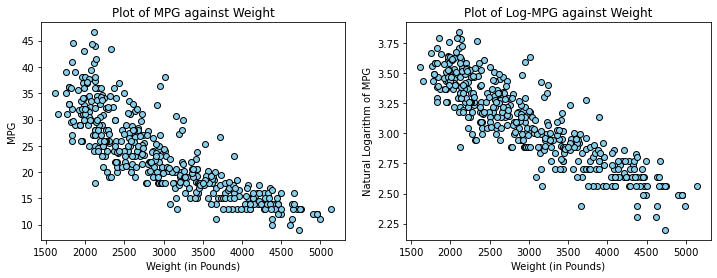

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')

plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show()

The first scatter plot exploring the relationship with MPG and vehicle weight has a slight curve.

The second scatter plot exploring the relationship between the ln-MPG and vehicle weight is mostly linear

## Part 2: Splitting the Data

Split the data into training and test sets

In [6]:
# split weight into training and testing sets
x_train = weight[:300]
x_test = weight[300:]

# split ln_mpg into training and testing sets
y_train = ln_mpg[:300]
y_test = ln_mpg[300:]

# split mpg into training and testing sets
mpg_train = mpg[:300]
mpg_test = mpg[300:]

# get weight training and testing sets sizes
n_train = len(x_train)
n_test = len(x_test)

# output lengths
tr = 'Training Set Size:'
te = 'Test Set Size:'
print(f'{tr:<18}{n_train:>4}')
print(f'{te:<18}{n_test:>4}')

Training Set Size: 300
Test Set Size:      98


Create scatter plots visualizing the data in the training and test sets.

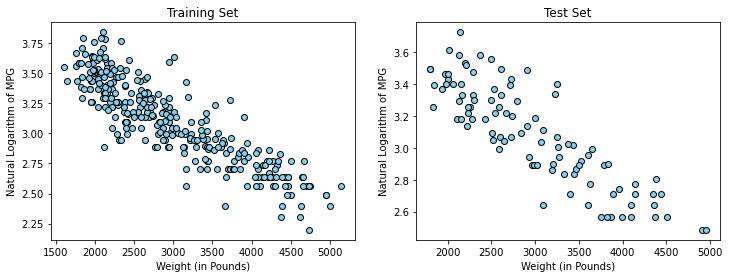

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 3: Descriptive Statistics

Calculate the mean and variance for our response variable and our predictor variable to use later to calculate the model's coefficients.

Start by calculating the mean of the x values (representing weight) and the mean of the y values (representing ln-MPG)

In [8]:
# calculate means of training sets
mean_x = (1/n_train)*(sum(x_train))
mean_y = (1/n_train)*(sum(y_train))

print(f'Mean of X = {mean_x:.2f}')
print(f'Mean of Y = {mean_y:.4f}')

Mean of X = 2968.62
Mean of Y = 3.1069


Calculate the sum of squared deviations for X and Y

In [9]:
# get sum of squared deviations for X
Sxx = 0
for i in x_train:
    Sxx += (i-mean_x)**2
    
# get sum of squared deviations for Y
Syy = 0
for i in y_train:
    Syy += (i-mean_y)**2
    
print(f'Sxx = {Sxx:.2f}')
print(f'Syy = {Syy:.4f}')

Sxx = 224006920.44
Syy = 36.0746


Calculate variance of training values of X and Y

In [10]:
# calc variance of X
var_x = Sxx/(n_train-1)
# calc variance of Y
var_y = Syy/(n_train-1)

print(f'Variance of X = {var_x:.2f}')
print(f'Variance of Y = {var_y:.4f}')

Variance of X = 749187.02
Variance of Y = 0.1207


## Part 4: Linear Regression Model
Calculate Sxy, which we will then use to find the coefficients for our linear regression model.

In [11]:
# calc Sxy
Sxy = 0
for i in range(len(x_train)):
    Sxy += (x_train[i] - mean_x)*(y_train[i] - mean_y)
    
print(f'Sxy = {Sxy:.2f}')

Sxy = -78999.13


Calculate the coefficients of the linear regression model

In [12]:
# calc beta_1
beta_1 = Sxy/Sxx
# calc beta_0
beta_0 = mean_y - beta_1*mean_x


print(f'beta_0 = {beta_0:.4f}')
print(f'beta_1 = {beta_1:.8f}')

beta_0 = 4.1538
beta_1 = -0.00035266


Visualize the regression line by plotting it on top of the scatter plots for the training set and the test set.

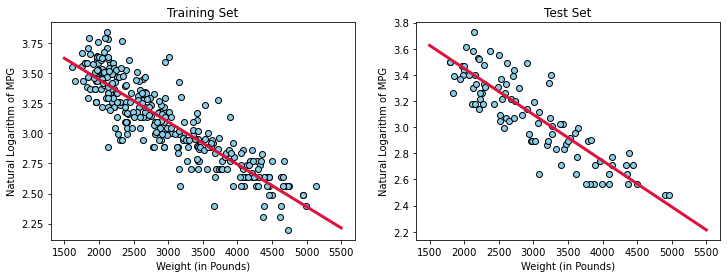

In [13]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score
Calculate the training r-squared score. Start by calculating estimated response values for the training set.

In [14]:
pred_y_train = []

# calc estimated response values
for i in x_train:
    c = beta_0 + beta_1*i
    pred_y_train.append(c)

Calculate the residuals for the training set.

In [15]:
error_y_train = []
# calc residuals list
for i in range(n_train):
    error = y_train[i] - pred_y_train[i]
    error_y_train.append(error)

Display the values mentioned above.

In [16]:
# print the first 10 values of each y_train, pred_y_train, and error_y_train
labels = ['True y', 'Pred y', 'Error']

z = 0
# for each column
for i in range(10):
    # print header and dashes for first iteration
    if z == 0:
        print(f'{labels[i]:>6}{labels[i+1]:>10}{labels[i+2]:>10}')
        print('-' * 26)
        z += 1
    # output each row
    print(f'{y_train[i]:>6.4f}{pred_y_train[i]:>10.4f}{error_y_train[i]:>10.4f}')

True y    Pred y     Error
--------------------------
3.3032    3.0289    0.2743
3.4904    3.4538    0.0366
2.8959    2.9513   -0.0554
2.8622    2.7150    0.1472
3.2347    2.9089    0.3258
3.4340    3.5286   -0.0946
3.3105    3.2122    0.0983
3.6661    3.5349    0.1312
3.5351    3.3822    0.1529
3.4012    3.3939    0.0073


Calculate the sum of squared errors score for the training set.

In [17]:
sse_train = 0
# calc SSE
for i in error_y_train:
    sse_train += i**2

print(f'Training SSE = {sse_train:.4f}')

Training SSE = 8.2145


Calculate the r-squared score for the training set.

In [18]:
# calc R^2 value
r2_train = 1 - sse_train/Syy
print(f'Training r-Squared = {r2_train:.4f}')

Training r-Squared = 0.7723


## Part 6: Test Score
Calculate the test r-squared score. Start by calculating estimated response values for the test set.

In [19]:
# calculate means of testing sets
mean_x_test = (1/n_test)*(sum(x_test))
mean_y_test = (1/n_test)*(sum(y_test))

# get sum of squared deviations for X
Sxx_test = 0
for i in x_test:
    Sxx_test += (i-mean_x_test)**2

# calc Sxy
Sxy_test = 0
for i in range(n_test):
    Sxy_test += (x_test[i] - mean_x_test)*(y_test[i] - mean_y_test)

# calc estimated response values
pred_y_test = []
for i in x_test:
    a = beta_0 + beta_1*i
    pred_y_test.append(a)

Calculate the residuals for the test set.

In [20]:
error_y_test = []
# get residuals and add to list
for i in range(n_test):
    error = y_test[i] - pred_y_test[i]
    error_y_test.append(error)

Display the values mentioned above.

In [21]:
# print the first 10 values of each y_test, pred_y_test, and error_y_test
labels = ['True y', 'Pred y', 'Error']

z = 0
# for each column
for i in range(10):
    # print header and dashes for first iteration
    if z == 0:
        print(f'{labels[i]:>6}{labels[i+1]:>10}{labels[i+2]:>10}')
        print('-' * 26)
        z += 1
    # output each row
    print(f'{y_test[i]:>6.4f}{pred_y_test[i]:>10.4f}{error_y_test[i]:>10.4f}')

True y    Pred y     Error
--------------------------
2.6391    3.0655   -0.4264
2.8904    2.8190    0.0714
2.9957    2.8663    0.1294
2.5649    2.7890   -0.2241
2.9957    3.2433   -0.2476
2.9444    3.1205   -0.1761
2.4849    2.4237    0.0612
3.2581    3.3586   -0.1005
3.7257    3.3977    0.3280
2.5649    2.7474   -0.1825


Calculate the sum of squared errors score for the test set.

In [22]:
sse_test = 0
# calc SSE
for i in error_y_test:
    sse_test += i**2

print(f'Test SSE = {sse_test:.4f}')

Test SSE = 2.4848


Calculate the value of Syy on the test set and use that and the test sum of squared errors to calculate the test r-squared score.

In [23]:
# get sum of squared deviations for Y
Syy_test = 0
for i in y_test:
    Syy_test += (i-mean_y_test)**2

# calc R^2 value
r2_test = 1 - sse_test/Syy_test
print(f'Training r-Squared = {r2_test:.4f}')

Training r-Squared = 0.7435


Create a plot to visualize the errors for the observations in the test set.

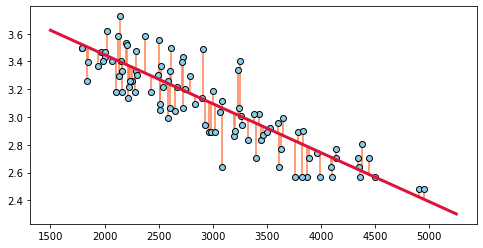

In [24]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250],c='crimson', lw=3)
for i in range(n_test):
    plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]], c='coral', zorder=0)
plt.show()

## Part 7: Transforming Test Predictions
Calculate estimates for the average MPG for observations in the test set.

In [25]:
e = 2.718281828
pred_mpg_test = []

# get MPG estimates for test set
for i in pred_y_test:
    z = e**i
    pred_mpg_test.append(z)

Calculate the error in each estimate for the average MPG.

In [26]:
error_mpg_test = []
# get residuals and add to list
for i in range(n_test):
    error = mpg_test[i] - pred_mpg_test[i]
    error_mpg_test.append(error)

Display the true MPG, the estimated MPG, and the estimation error for each of the first 10 observations in the test set.

In [27]:
# print the first 10 values of mpg_test, pred_mpg_test, and error_mpg_test
labels = ['True MPG', 'Pred MPG', 'Error']

z = 0
# for each column
for i in range(10):
    # print header and dashes for first iteration
    if z == 0:
        print(f'{labels[i]:>8}{labels[i+1]:>12}{labels[i+2]:>9}')
        print('-' * 29)
        z += 1
    # output each row
    print(f'{mpg_test[i]:>8.1f}{pred_mpg_test[i]:>12.1f}{error_mpg_test[i]:>9.1f}')

True MPG    Pred MPG    Error
-----------------------------
    14.0        21.4     -7.4
    18.0        16.8      1.2
    20.0        17.6      2.4
    13.0        16.3     -3.3
    20.0        25.6     -5.6
    19.0        22.7     -3.7
    12.0        11.3      0.7
    26.0        28.7     -2.7
    41.5        29.9     11.6
    13.0        15.6     -2.6
